# Packet Anomaly Detection using Random Forest

## Introduction

In this script, we perform anomaly detection on network packet data using a machine learning approach. The goal is to predict whether network traffic belongs to a normal or anomalous class based on features such as packet time and length.

The process includes:

1. **Data Loading and Preprocessing**: We load the dataset and perform basic data analysis, including checking the statistical summary and visualizing key features.
2. **Feature Engineering**: We encode categorical variables and scale numerical features to prepare the data for training the machine learning model.
3. **Model Training**: We use a Random Forest Classifier, a powerful ensemble learning method, to train the model on the data.
4. **Model Evaluation**: After training the model, we evaluate its performance using metrics such as accuracy, precision, recall, and F1-score.
5. **Visualization**: We visualize the packet data, the distribution of target classes, and model performance through various plots.

In addition to the anomaly detection script, we also developed a **Flask web application** to monitor and detect anomalies in real-time network traffic. The Flask app provides:

### Flask Web Application:
- **Real-time Anomaly Detection**: The app runs a background process that monitors a CSV file containing packet data. It checks for new packets every 10 seconds and predicts whether each packet is normal or anomalous based on the trained Random Forest model.
- **Alerts and Notifications**: If any anomalies are detected, they are added to an alert list. This list is accessible via the Flask app.
- **Endpoints**:
  - `/alerts`: A REST endpoint that returns the list of detected anomalies in JSON format.
  - `/normal_traffic`: A REST endpoint that returns only the normal traffic (i.e., packets predicted as "Normal") in JSON format.
  - `/`: The main homepage of the Flask app that displays a list of alerts, giving real-time feedback on anomalies in the packet traffic.

The Flask application continuously checks for new data, applies the anomaly detection model to the incoming data, and provides a dynamic and interactive web interface to visualize detected anomalies and monitor network traffic in real-time.

This script leverages libraries like `pandas` for data manipulation, `scikit-learn` for machine learning, and `matplotlib` for visualization.

---

In [1]:
# Import necessary libraries
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Load the dataset
# Here, we are loading a CSV file containing the dataset into a DataFrame for analysis.
data = pd.read_csv('train_net.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,1,0.000000e+00,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,195,443 > 54762 Len=133,Normal
1,2,2.240000e-07,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,112,443 > 54762 Len=50,Normal
2,3,2.737900e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,107,54762 > 443 Len=45,Normal
3,4,3.563550e-04,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,2404:6800:4007:80a::200a,UDP,102,54762 > 443 Len=40,Normal
4,5,5.886481e-02,2404:6800:4007:80a::200a,2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236,UDP,87,443 > 54762 Len=25,Normal


In [4]:
# Display a statistical summary of the dataset
# This will give us an idea of the distribution of numerical data, such as mean, standard deviation, etc.
print("\nStatistical summary of the dataset:")
data.describe()


Statistical summary of the dataset:


,No.,Time,Length
count,117084.000000,117084.000000,117084.000000
mean,58542.500000,2557.265139,675.000145
std,33799.383796,1998.481859,1062.354699
min,1.000000,0.000000,42.000000
25%,29271.750000,745.480519,86.000000
50%,58542.500000,2051.053935,101.000000
75%,87813.250000,3985.455522,1292.000000
max,117084.000000,6941.356968,17838.000000


In [5]:
# Data analysis
# Convert the data to a DataFrame if it's not already in this format.
df = pd.DataFrame(data)

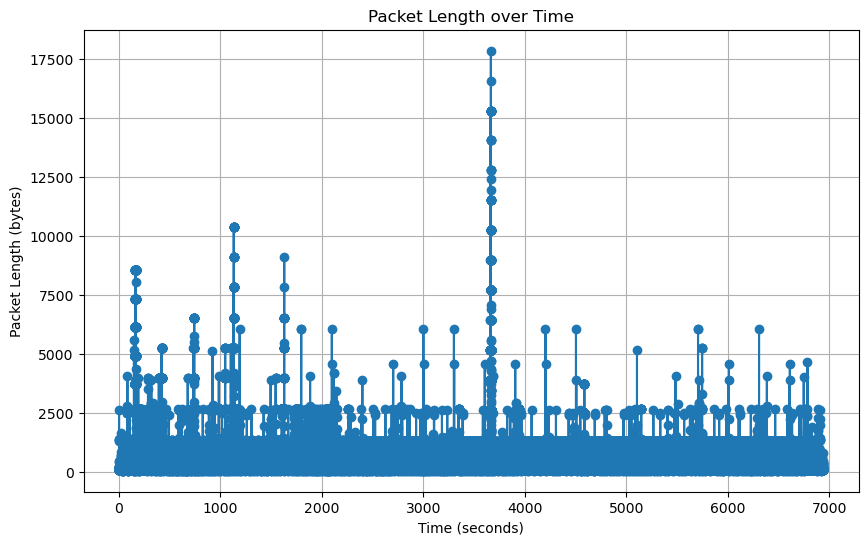

In [6]:
# --- Data Visualization ---
# Visualize the relationship between 'Time' and 'Length'
# This will help us understand if there are any trends or patterns in packet length over time.

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Length'], marker='o')
plt.title('Packet Length over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Length (bytes)')
plt.grid(True)
plt.show()

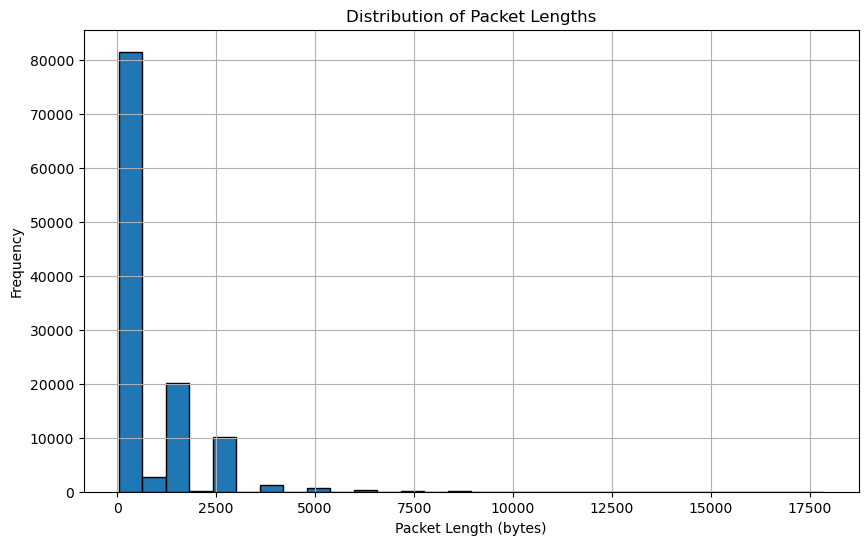

In [7]:
# Additional Analysis: Visualize the distribution of packet length
# This helps to understand how the packet lengths are distributed, and if they follow a normal distribution.
plt.figure(figsize=(10, 6))
plt.hist(df['Length'], bins=30, edgecolor='black')
plt.title('Distribution of Packet Lengths')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

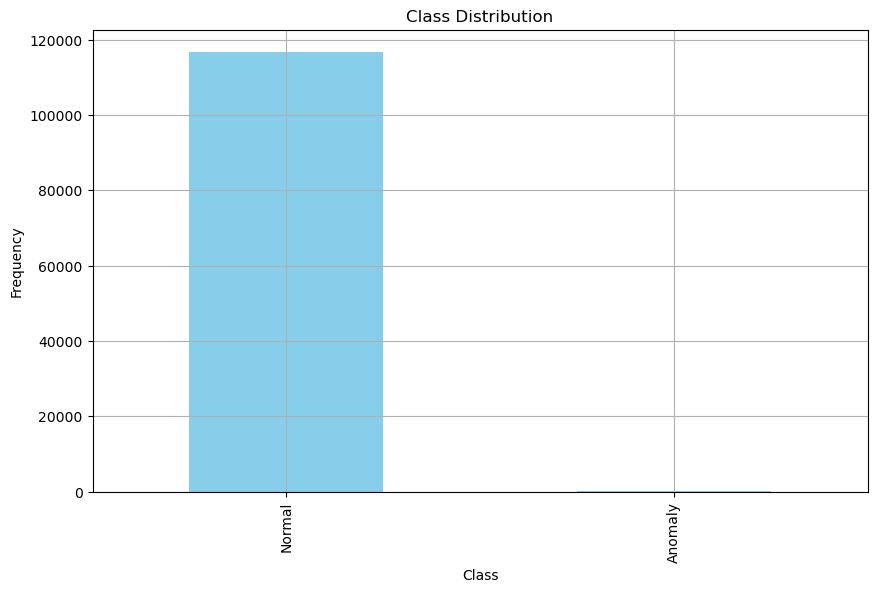

In [8]:
# Visualizing the distribution of the target variable 'Class'
# This will show how balanced or imbalanced the target variable is.
plt.figure(figsize=(10, 6))
df['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Feature extraction and encoding
# Label encoding the target variable 'Class' (since it's likely categorical).
data['Class'] = LabelEncoder().fit_transform(data['Class'])

# Select the features (X) and target variable (y)
X = data[['Time', 'Length']]
y = data['Class']

# Scale the features using StandardScaler for better model performance
# Scaling ensures that features with different units/values are treated equally by the model.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model Training ---
# Now we will train a RandomForestClassifier model on the training set.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Save the trained model and scaler using joblib for future use.
# This way, you can load the model and scaler later to make predictions without retraining.
joblib.dump(model, 'anomaly_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model training complete and saved.")

Model training complete and saved.


In [11]:
# --- Model Evaluation ---
# Make predictions on the test set using the trained model.
y_pred = model.predict(X_test)

# Display the classification report to evaluate the performance of the model.
# This will show precision, recall, F1-score, and accuracy for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00     23369

    accuracy                           1.00     23417
   macro avg       1.00      1.00      1.00     23417
weighted avg       1.00      1.00      1.00     23417



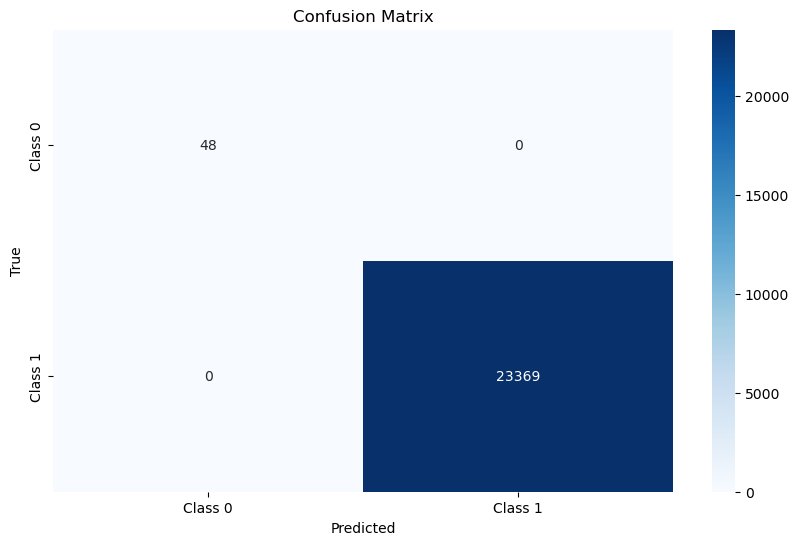

In [12]:
# --- Visualizing Model Performance ---
# Plotting the confusion matrix to better understand how well the model is classifying each class.

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

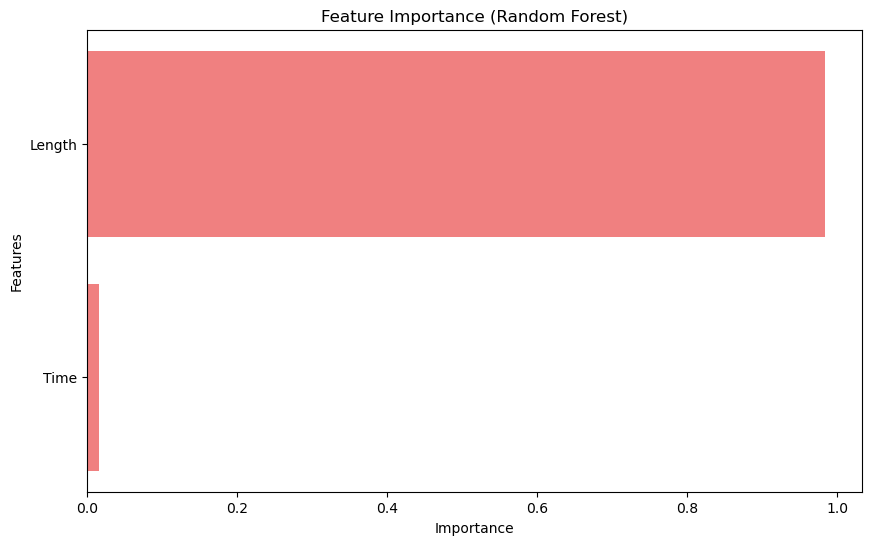

In [13]:
# Plotting the feature importance from the trained Random Forest model.
# This helps in understanding which features were most influential in predicting the target variable.

importances = model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='lightcoral')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()